In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import graphviz,pydotplus
from sklearn.model_selection import GridSearchCV,train_test_split

In [2]:
wine_data= pd.read_csv('WineQT.csv')

In [3]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
wine_data.dropna(axis=0,inplace=True)

In [5]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [6]:
bins=[2,4,5,6,8]
labels=['bad','average','good','very good']
temp=pd.cut(wine_data['quality'],bins=bins,labels=labels)
wine_data.drop('quality',axis=1,inplace=True)
wine_data=pd.concat([wine_data,temp],axis=1)
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,average
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2,average
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1592,good
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1593,good
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1594,average
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1595,good


In [7]:
wine_data[wine_data['quality']=='bad']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id,quality
29,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.30,41,bad
32,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.10,45,bad
50,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.20,73,bad
54,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,1.12,9.10,79,bad
66,5.0,1.020,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.50,94,bad
103,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.40,151,bad
112,7.6,0.680,0.02,1.3,0.072,9.0,20.0,0.99650,3.17,1.08,9.20,161,bad
118,7.3,0.550,0.03,1.6,0.072,17.0,42.0,0.99560,3.37,0.48,9.00,167,bad
120,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,9.10,170,bad
142,6.9,1.090,0.06,2.1,0.061,12.0,31.0,0.99480,3.51,0.43,11.40,199,bad


In [8]:
wine_data.dropna(axis=0,inplace=True)

     quality  Counts
0        bad      39
1    average     483
2       good     462
3  very good     159


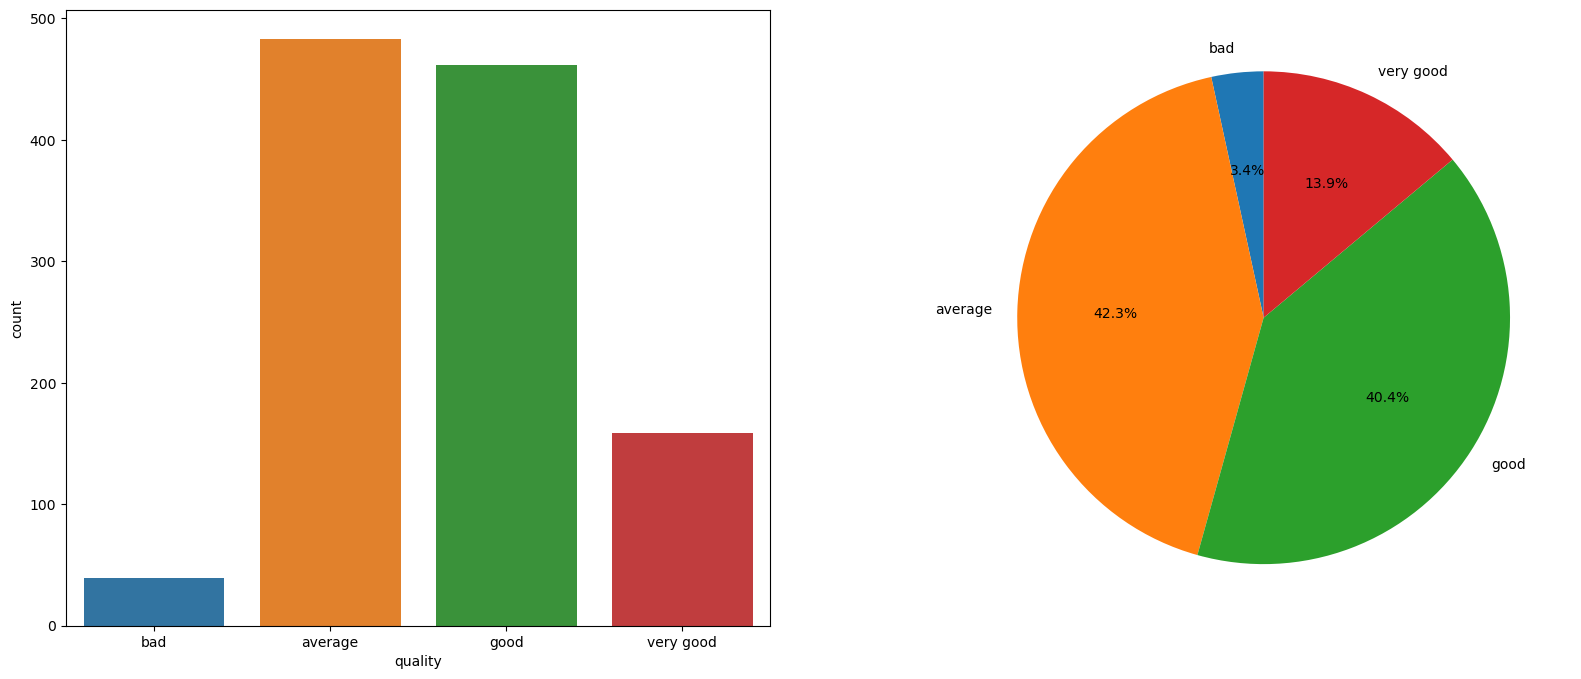

In [9]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(data=wine_data,x=wine_data['quality'],ax=ax[0])
t=wine_data.groupby('quality')['quality'].count().reset_index(name='Counts')
print(t)
ax[1].pie(t['Counts'],labels=t['quality'],startangle=90,autopct="%.1f%%")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_21000\588894864.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corre=pd.DataFrame(data=wine_data.corr())


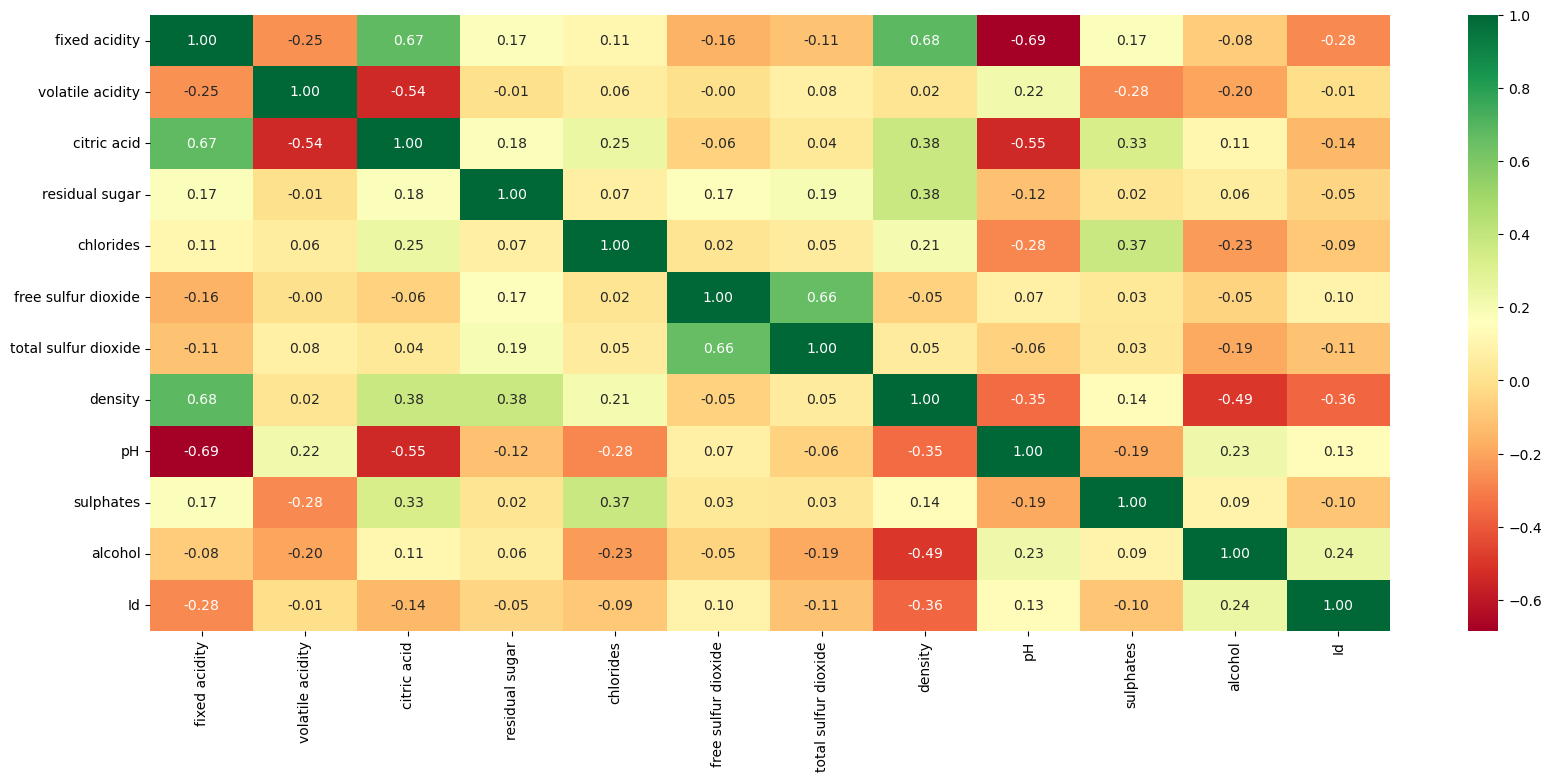

In [10]:
corre=pd.DataFrame(data=wine_data.corr())
plt.figure(figsize=(20,8))
sns.heatmap(corre,annot=True,fmt='.2f',cmap='RdYlGn')
plt.show()

In [11]:
df_train,df_test=train_test_split(wine_data,train_size=0.7,test_size=0.3,random_state=100)

In [12]:
y_train=df_train.pop('quality')
x_train=df_train
y_test=df_test.pop('quality')
x_test=df_test

In [13]:
dectree=DecisionTreeClassifier()
dectree.fit(x_train,y_train)
y_train_pred=dectree.predict(x_train)
print(accuracy_score(y_train,y_train_pred))

1.0



(process:9740): GLib-GIO-WARNING **: 23:04:43.921: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2305.26.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:9740): GLib-GIO-WARNING **: 23:04:44.023: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.7.9.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



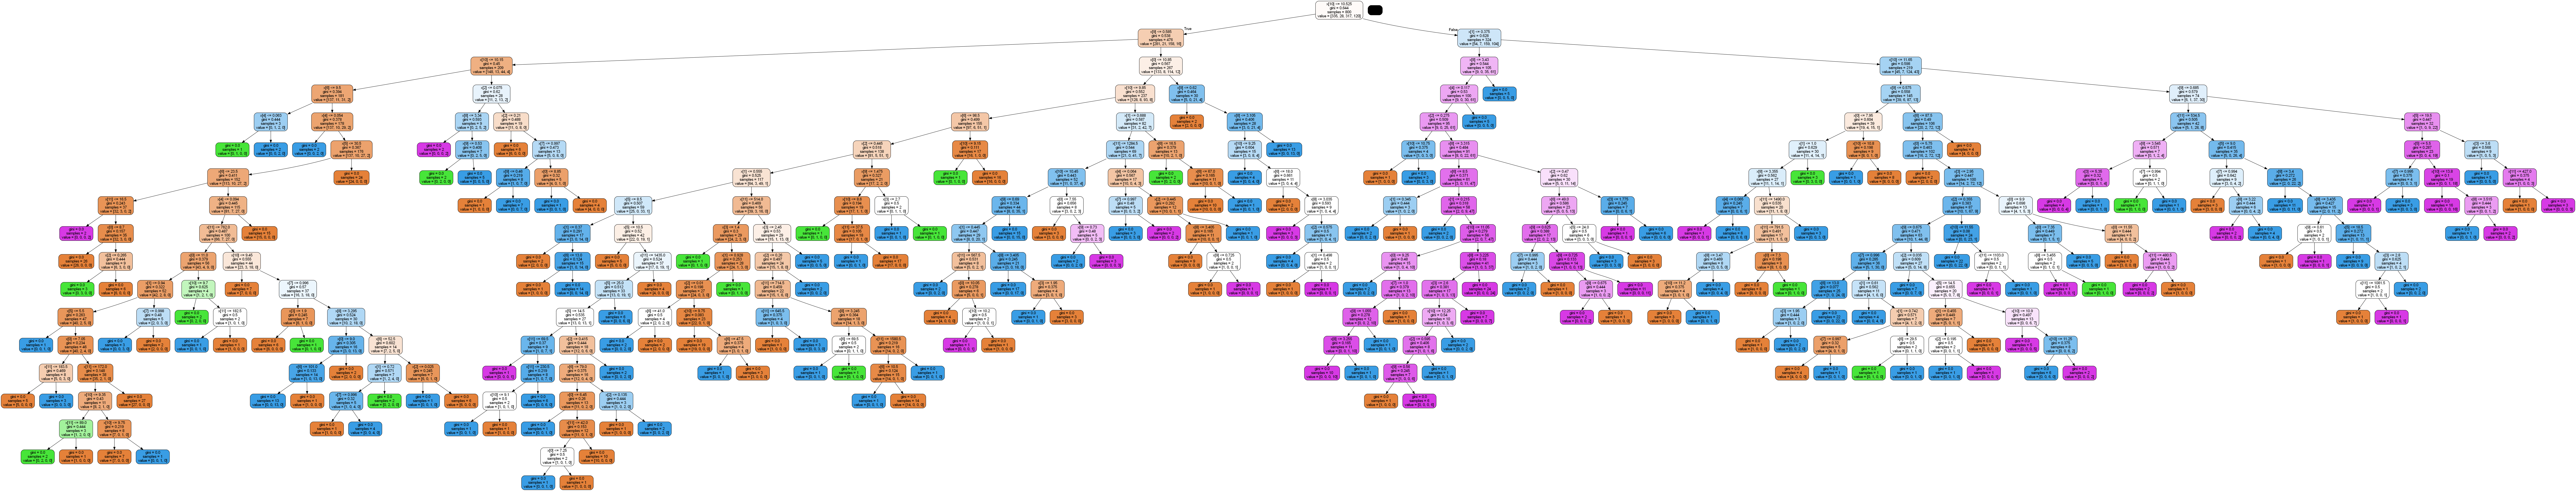

In [14]:
from IPython.display import Image
features=x_train.columns.tolist()
dot_data=StringIO()
export_graphviz(dectree,out_file=dot_data,rounded=True,filled=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [42]:
dtree=DecisionTreeClassifier(random_state=100)
hyparam={'max_depth':range(2,7),'min_samples_split':range(2,40,5),'max_leaf_nodes':range(2,30,2),
        'criterion':['gini','entropy']}
tree=GridSearchCV(dtree,hyparam,cv=5,scoring='accuracy',return_train_score=True,n_jobs=-1,verbose=3)
tree.fit(x_train,y_train)
print(tree.best_score_)
print(tree.best_estimator_)

Fitting 5 folds for each of 1120 candidates, totalling 5600 fits
0.6
DecisionTreeClassifier(max_depth=6, max_leaf_nodes=22, min_samples_split=32,
                       random_state=100)


In [43]:
print(tree.best_score_)

0.6


In [44]:
fintree=DecisionTreeClassifier(max_depth=6, max_leaf_nodes=22, min_samples_split=32,random_state=100)
fintree.fit(x_train,y_train)
y_train_pred=fintree.predict(x_train)
accuracy_score(y_train,y_train_pred)

0.68875

In [46]:
y_test_pred=fintree.predict(x_test)
accuracy_score(y_test,y_test_pred)

0.5801749271137027

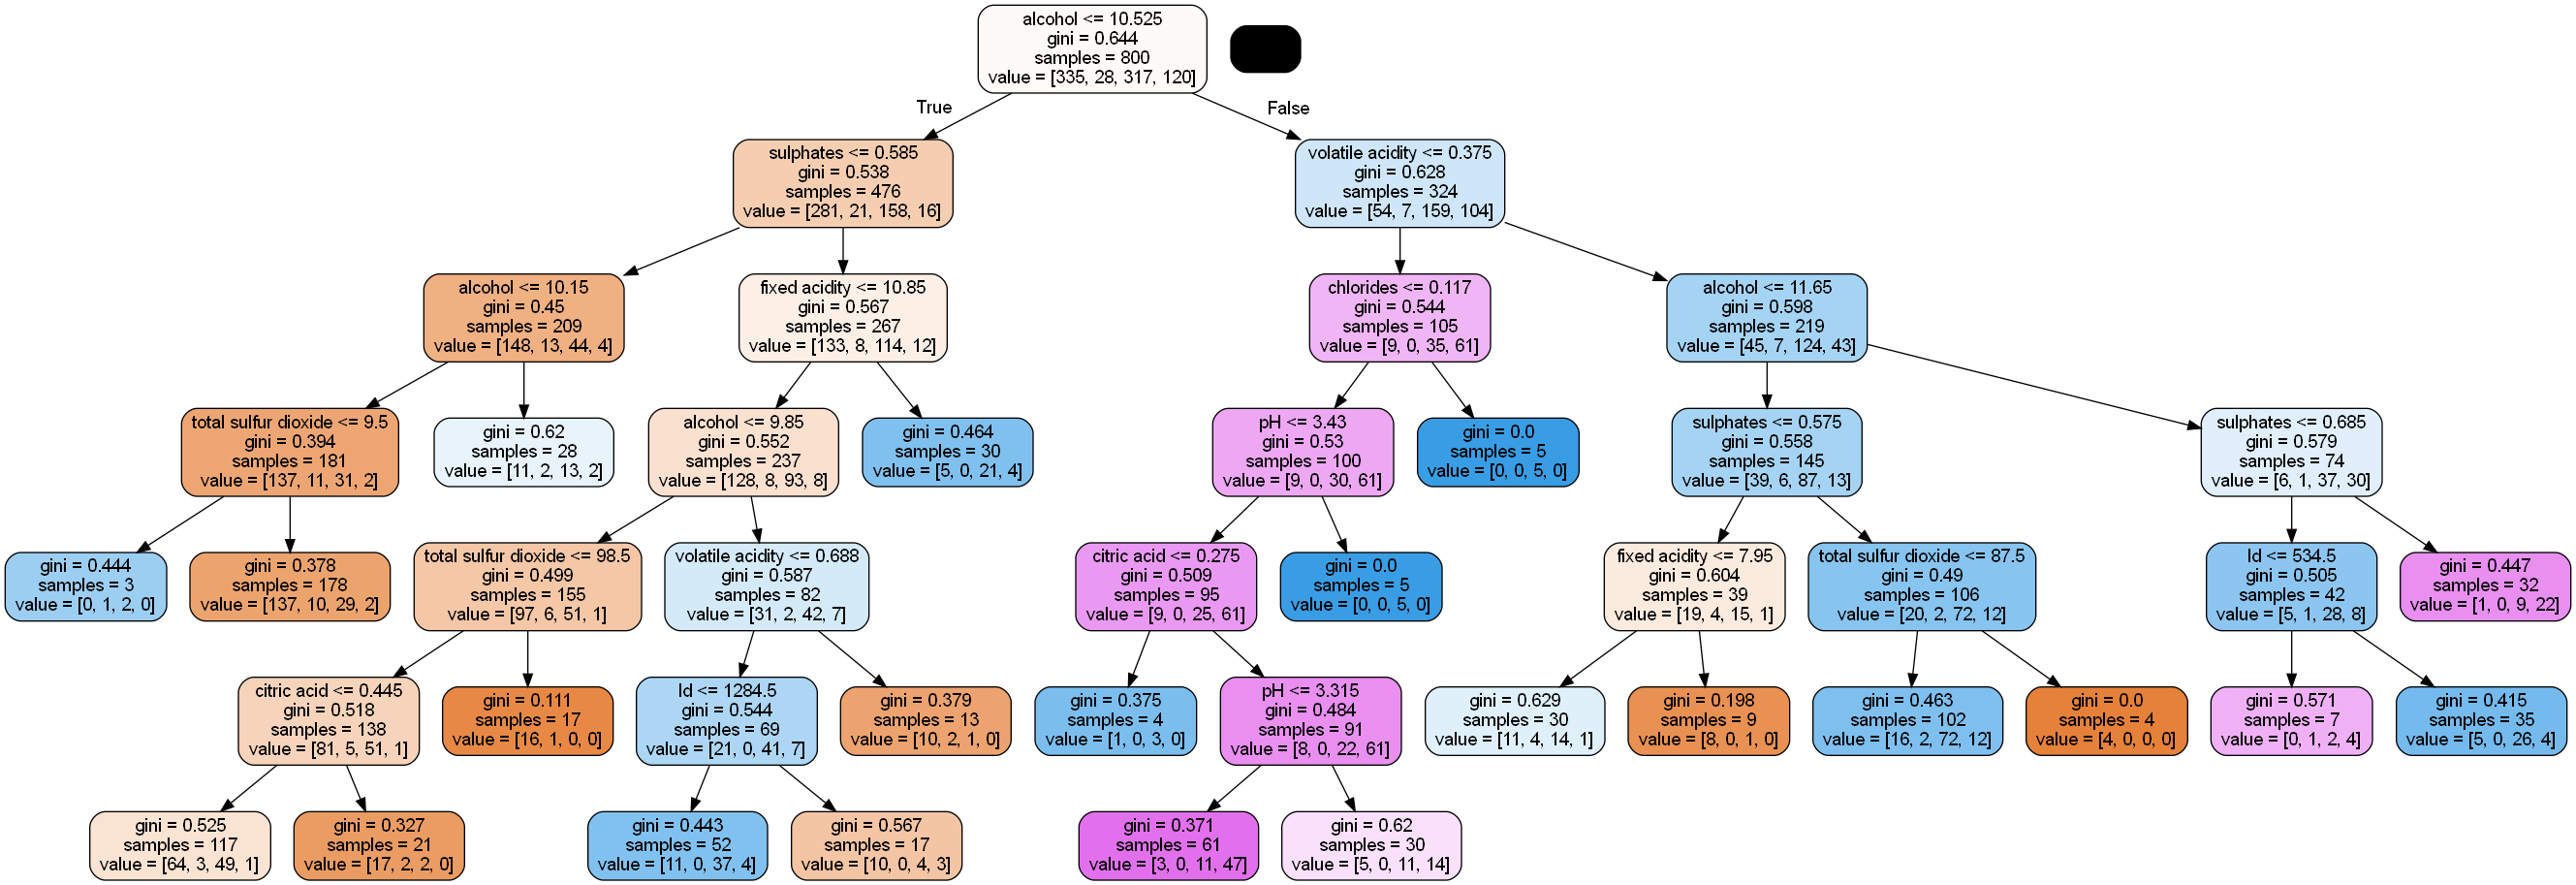

In [47]:
dot_data_1=StringIO()
export_graphviz(fintree,out_file=dot_data_1,feature_names=features,rounded=True,filled=True)
graph=pydotplus.graph_from_dot_data(dot_data_1.getvalue())
Image(graph.create_png())